# Compare multi fitted atmospheric parameters - Grey attenuation

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : June 2th 2023
- last update : June 2th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## Data

In [5]:
DATE="2023"

In [6]:
FLAG_SELECT_POLAR = True
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [7]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [8]:
path_out = "dataout/fitparamatm"

In [9]:
!ls dataout/fitparamatm

multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-05-09-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-05-10-empty~holo4_003-psf2dffm-polar.csv
multifitcovparamatm-2023-05-11-empty~holo4_003-psf2dffm-polar.csv


In [10]:
filenames = [
"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-11-empty~holo4_003-psf2dffm-polar.csv",    
]

In [11]:
NDAYS = len(filenames)
tags = [
    "2023/01/17","2023/01/18",
    "2023/05/09",
    "2023/05/10","2023/05/11"
]

In [12]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename), index_col=0)
    df=df.dropna(axis=0)
    
    #cut on chi2
    df = df[df['chi2_1']<400]
    
    if FLAG_SELECT_POLAR:
        df = df[df["spec_target_label"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [13]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
1,2,2023051100160,2023-05-11T23:52:01.599991556Z,HD185975,empty,2.125477,0,0,0,-149.718423,...,0.001850,0.074003,6.810999,7.245593,1.021730,0.256598,0.001675,0.042276,5.544981,0.980209
2,3,2023051100163,2023-05-11T23:53:55.034507293Z,HD185975,empty,2.124050,0,0,0,-149.124051,...,0.001631,0.110717,5.361623,7.320346,1.017206,0.234151,0.001519,0.086255,6.384325,0.757046
3,13,2023051100203,2023-05-12T00:20:48.671994986Z,HD185975,empty,2.113478,0,0,0,-142.433459,...,0.002014,0.067707,9.087365,7.026846,1.024199,0.303880,0.001976,0.014076,5.645572,0.878179
9,19,2023051100228,2023-05-12T00:40:22.965507207Z,HD185975,empty,2.104620,0,0,0,-137.582208,...,0.001699,0.088052,5.457459,7.460522,1.024639,0.233884,0.001522,0.074876,6.102036,0.922780
10,20,2023051100233,2023-05-12T00:44:31.382492410Z,HD185975,empty,2.103332,0,0,0,-136.717421,...,0.001635,0.066612,4.088804,7.262500,1.010128,0.211648,0.001363,0.045800,6.009896,0.735803
11,21,2023051100236,2023-05-12T00:46:44.261508838Z,HD185975,empty,2.101509,0,0,0,-135.994466,...,0.003229,0.088654,22.301741,6.175447,1.012504,0.458125,0.003073,0.145644,5.510697,0.659891
13,23,2023051100245,2023-05-12T00:53:58.869992498Z,HD185975,empty,2.098629,0,0,0,-134.384948,...,0.001464,0.082176,3.963201,7.633003,1.015319,0.225693,0.001424,0.050955,6.103059,0.901676
16,26,2023051100257,2023-05-12T01:03:30.314509927Z,HD185975,empty,2.093680,0,0,0,-132.033461,...,0.002083,0.009151,6.671683,7.249855,1.024393,0.263372,0.001698,0.001724,6.043907,0.654620
17,27,2023051100260,2023-05-12T01:05:44.961991483Z,HD185975,empty,2.091748,0,0,0,-131.283427,...,0.002275,0.075838,11.191696,6.902173,1.025930,0.332267,0.002200,0.037959,5.569093,0.834025


In [14]:
NF =len(all_df)

In [15]:
all_df[0].head()

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
0,0,2023011700238,2023-01-18T02:33:44.320492641Z,HD185975,empty,2.094160,0,0,0,-221.203268,...,0.000984,0.082020,1.677237,4.064791,1.015405,0.131000,0.000957,0.028359,3.559431,0.459662
1,1,2023011700239,2023-01-18T02:34:27.138506292Z,HD185975,empty,2.094525,0,0,0,-221.024161,...,0.000865,0.081564,1.595088,4.092131,1.012622,0.132569,0.000973,0.047178,3.390434,0.615950
2,4,2023011700248,2023-01-18T03:05:13.302506988Z,HD185975,empty,2.109638,0,0,0,-213.214165,...,0.001476,0.098747,4.075385,3.787810,1.001530,0.187970,0.001407,0.020357,3.298105,0.333917
3,5,2023011700249,2023-01-18T03:05:56.221990758Z,HD185975,empty,2.109952,0,0,0,-213.034826,...,0.001163,0.090850,3.721151,3.743248,1.003164,0.189475,0.001414,0.007630,3.167403,0.327325
4,12,2023011700297,2023-01-18T03:48:30.275498016Z,HD185975,empty,2.126041,0,0,0,-202.940574,...,0.001029,0.068032,1.513858,3.622861,1.012200,0.116538,0.000891,0.031719,2.895900,0.537305


In [16]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74857/1147230304.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


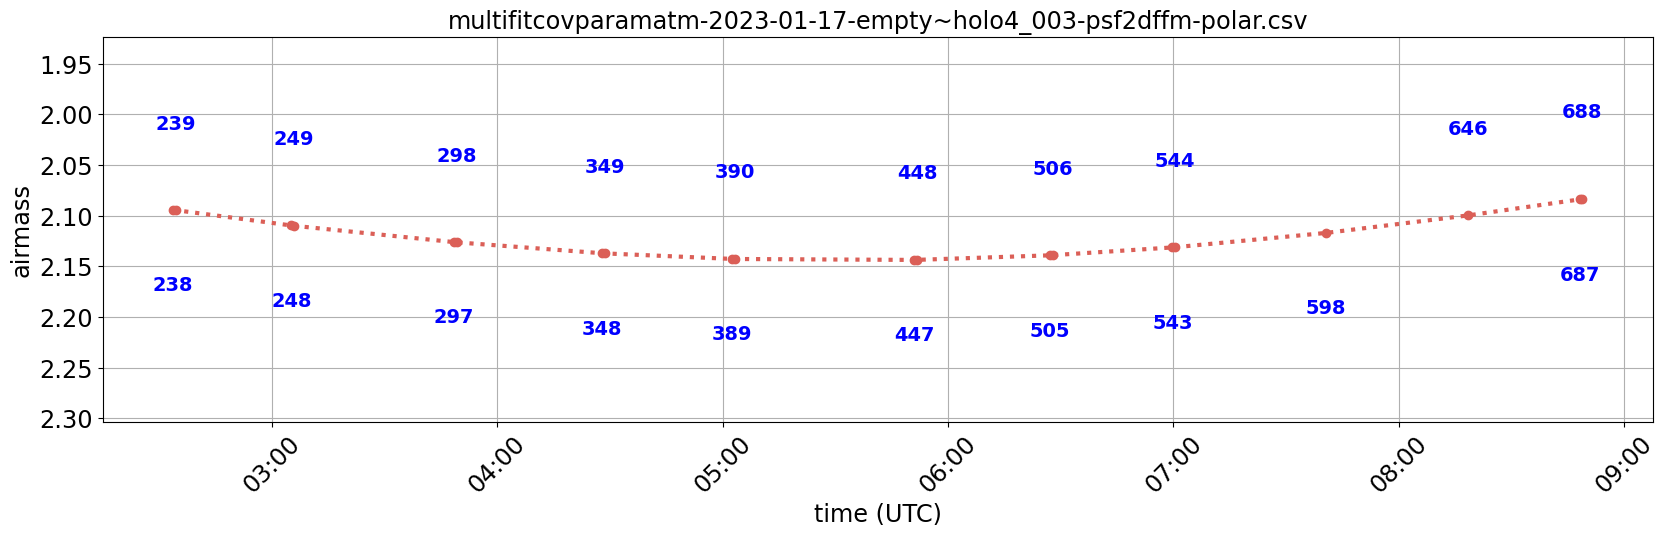

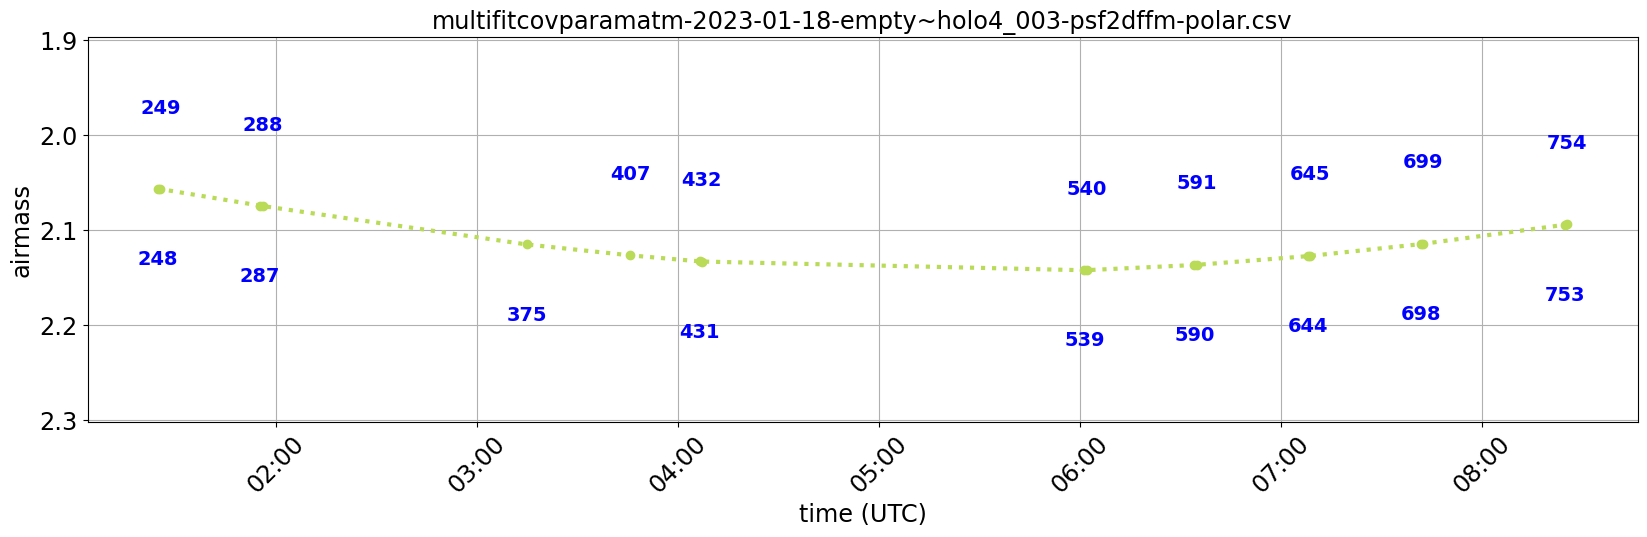

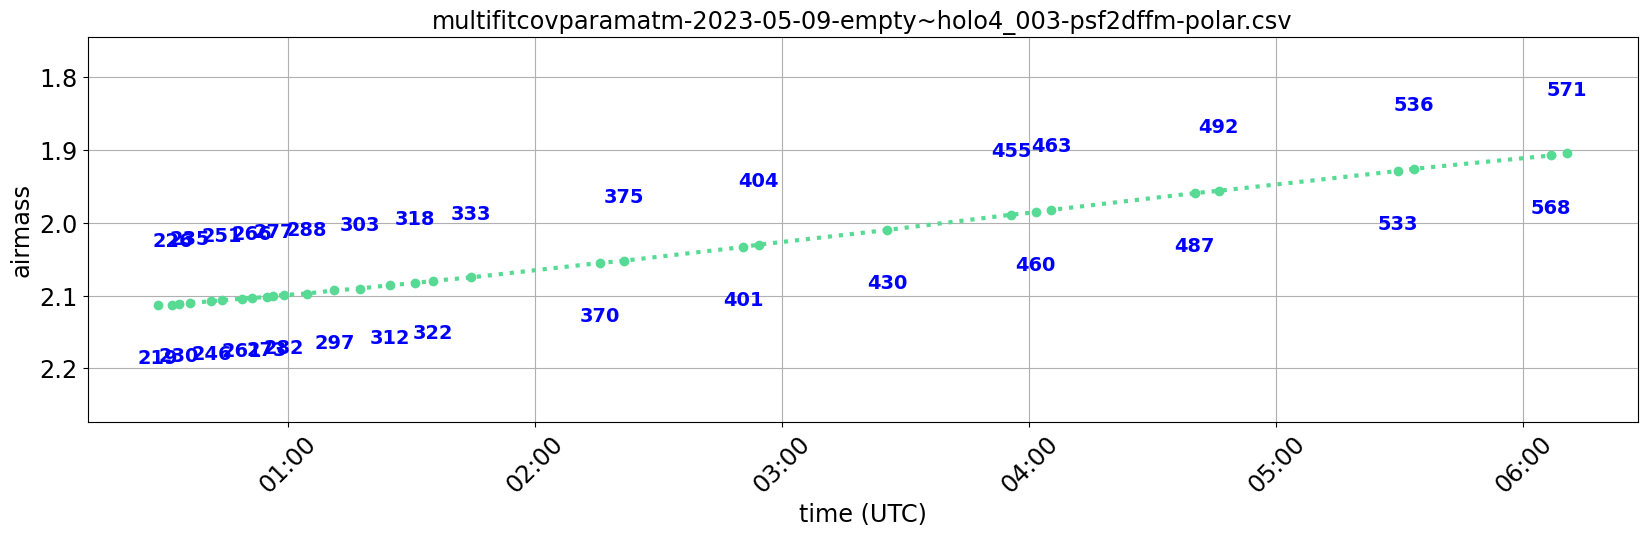

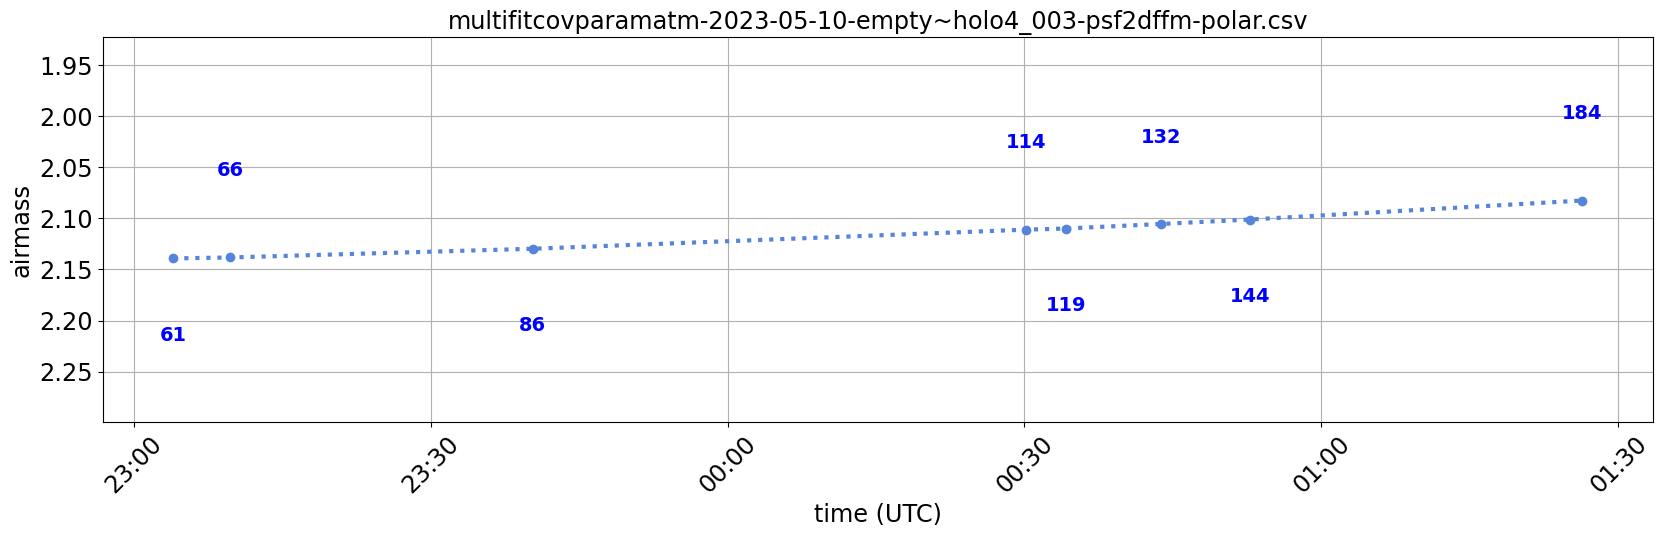

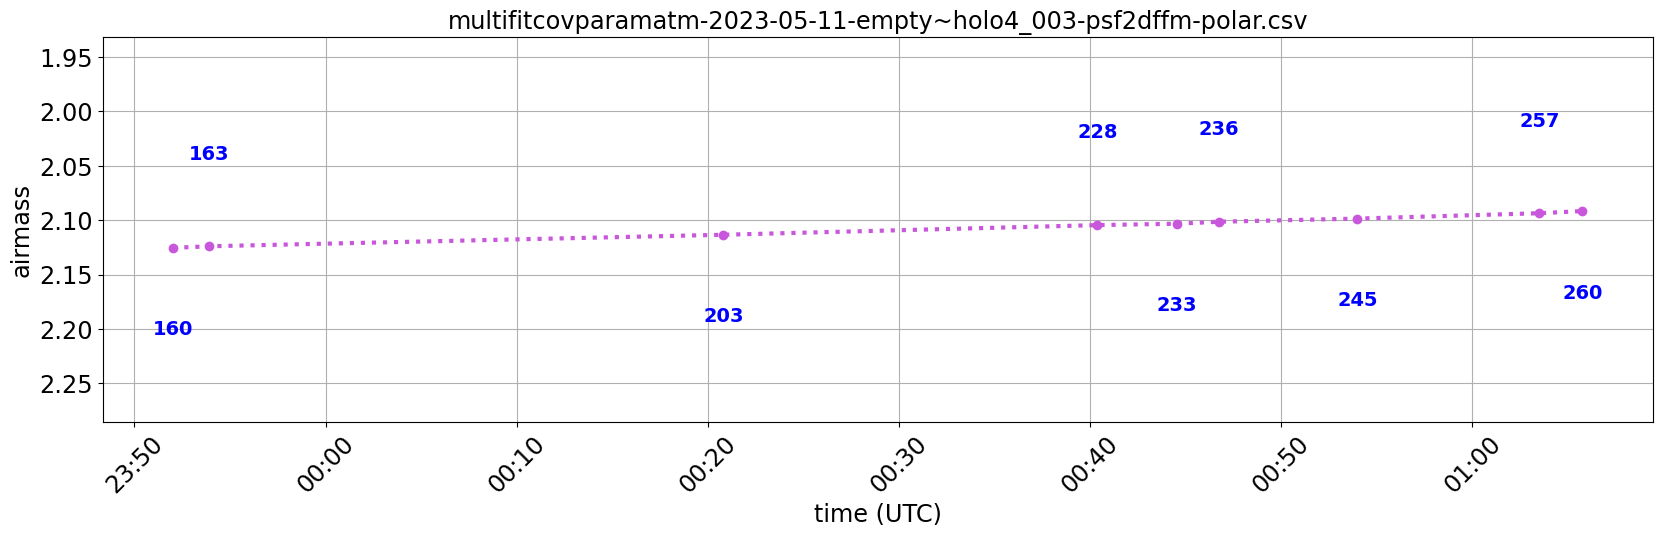

In [17]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    airmasses = infos['spec_airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

# Function to find pairs

In [18]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print(difftimes)
    all_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            all_pairs.append(idx)
    return all_pairs

## Grey term

### Plot all grey in different figures

In [19]:
hls_colors = sns.color_palette("hls", NF)

In [20]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74857/3523515846.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


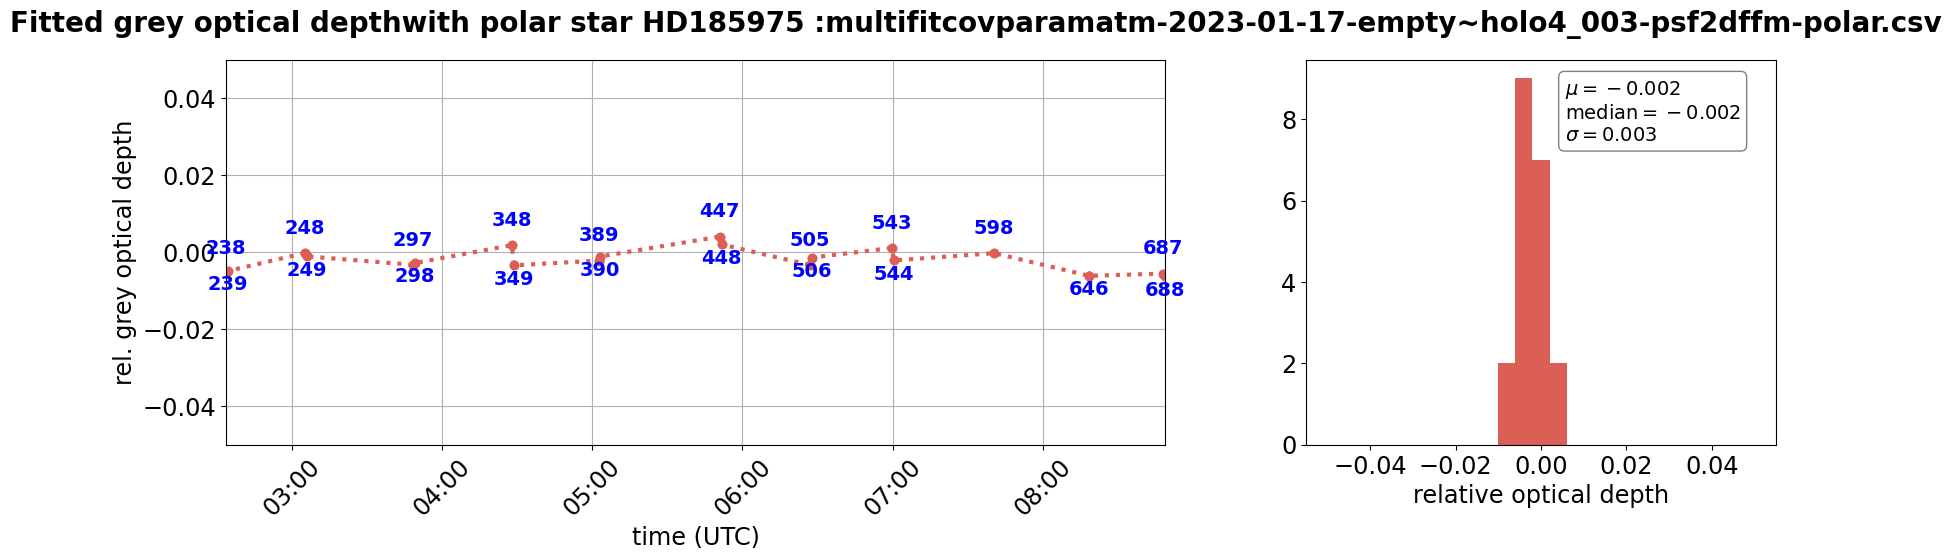

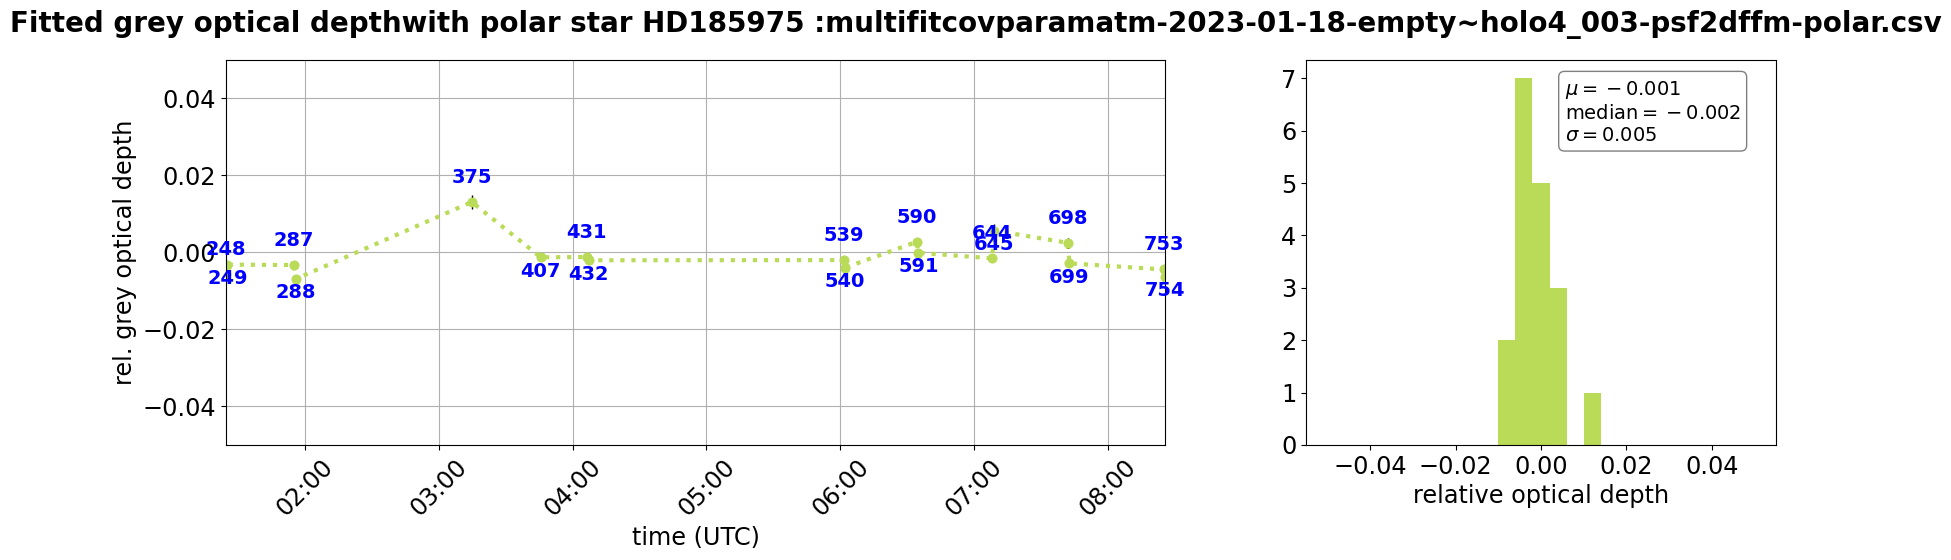

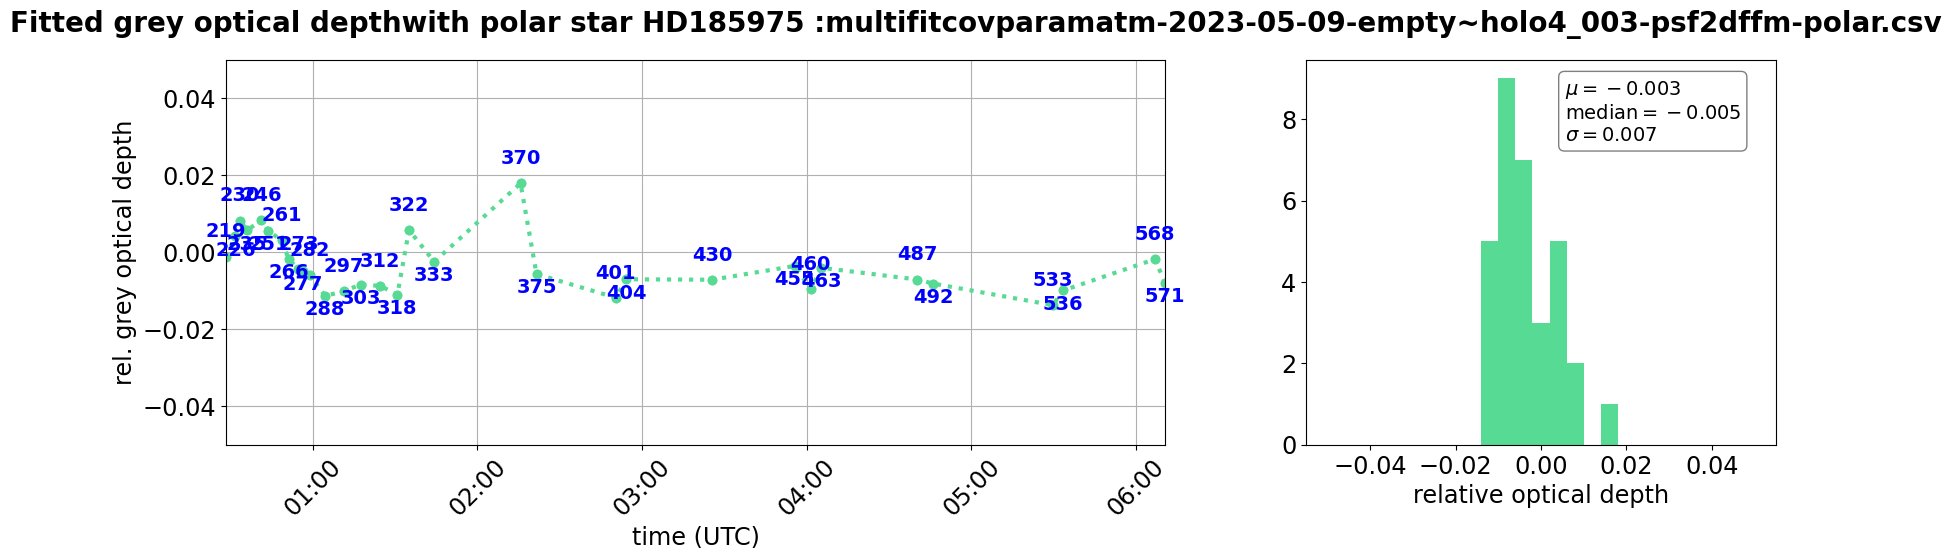

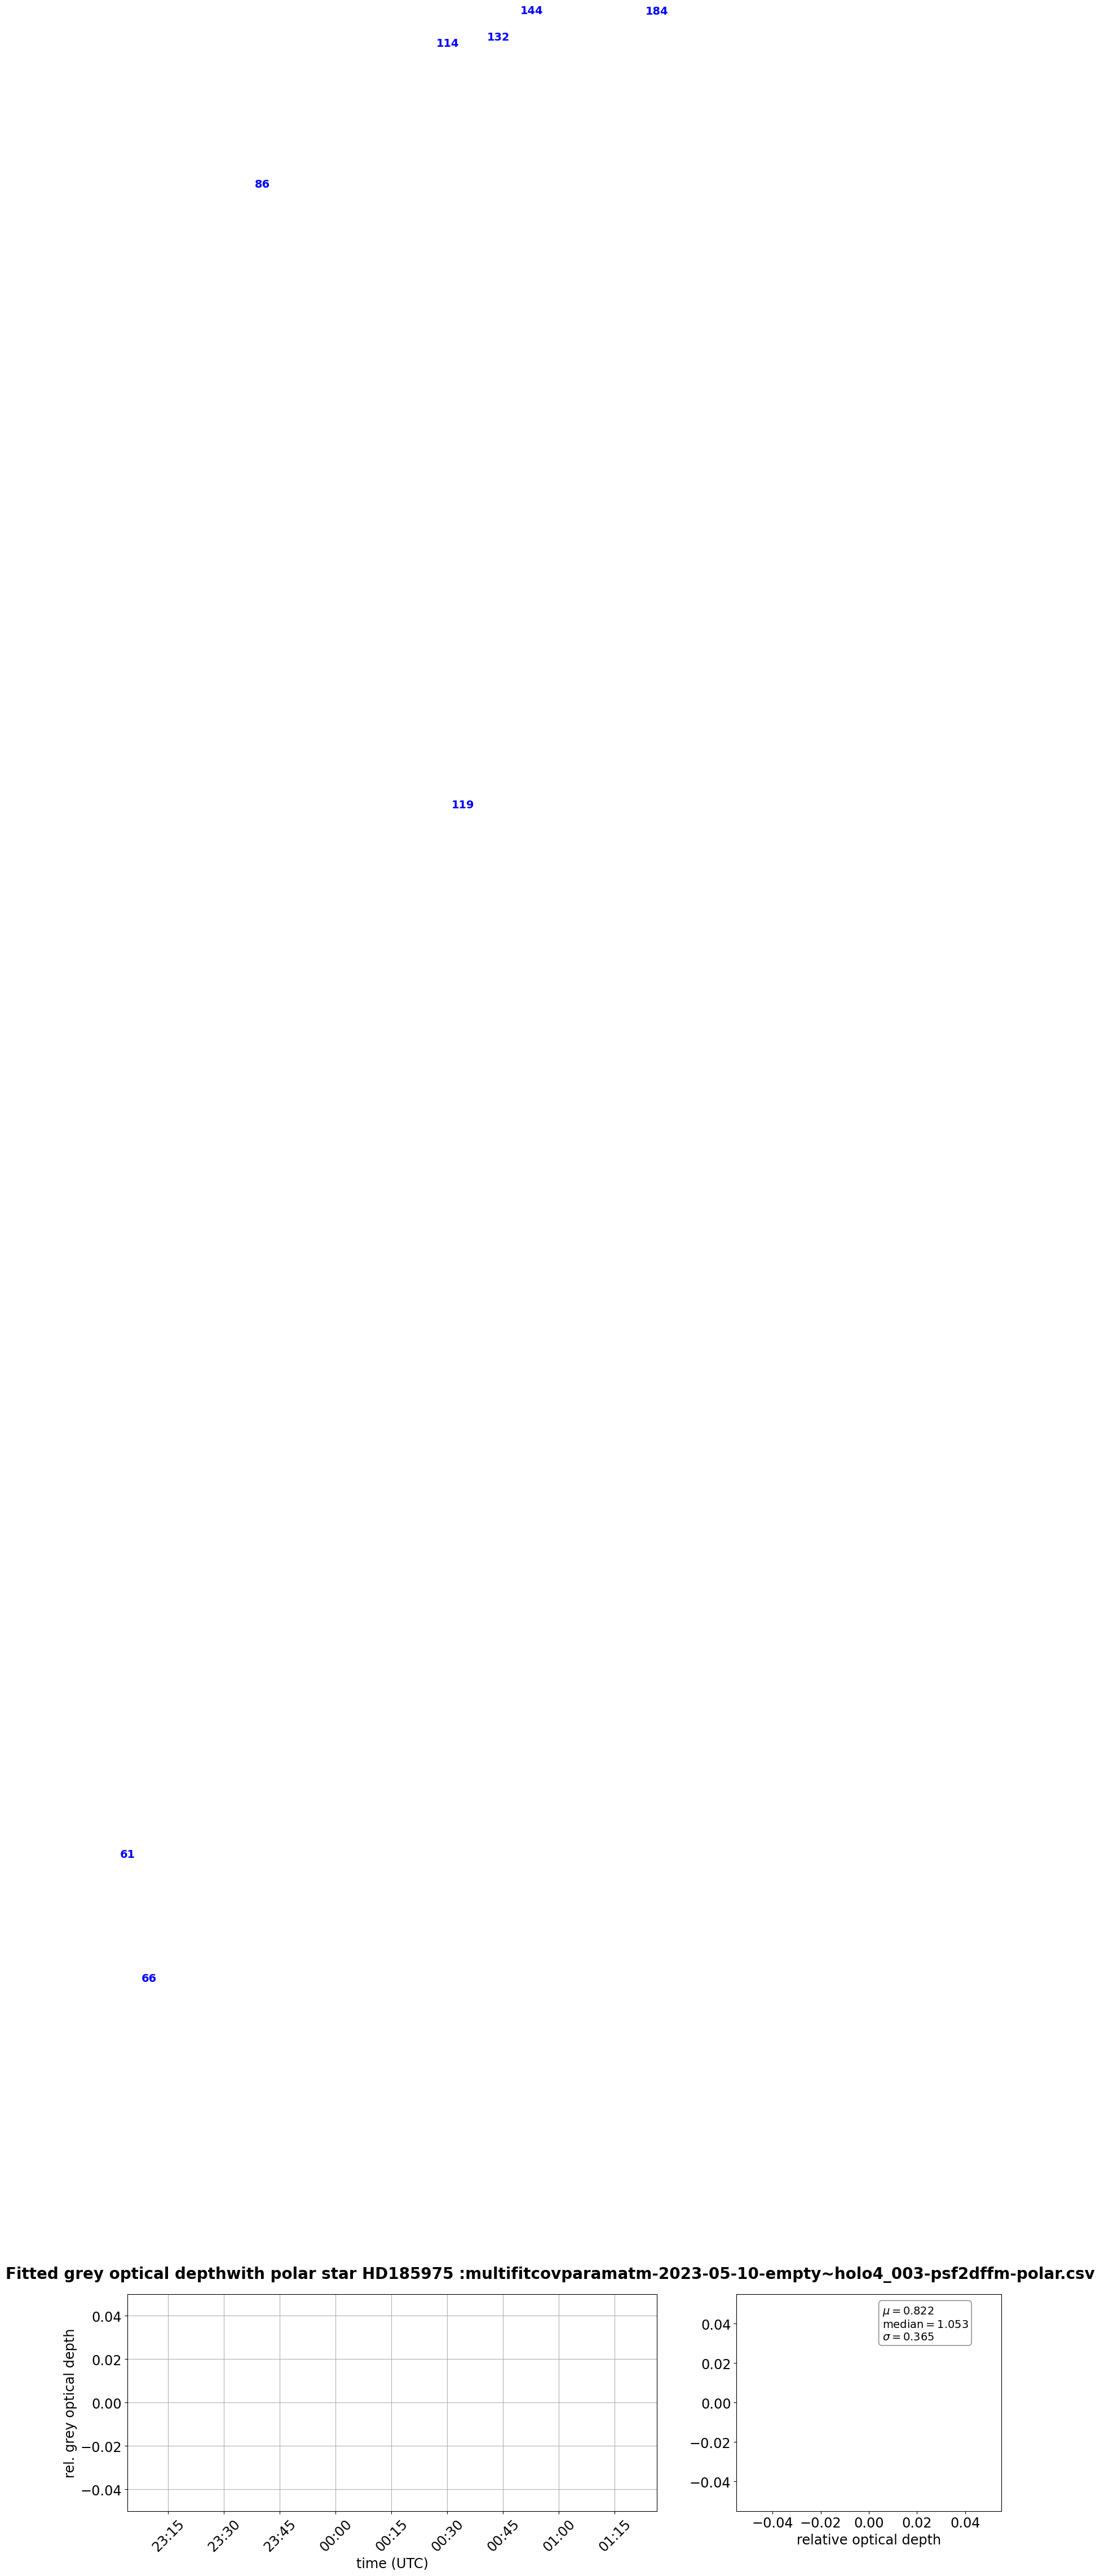

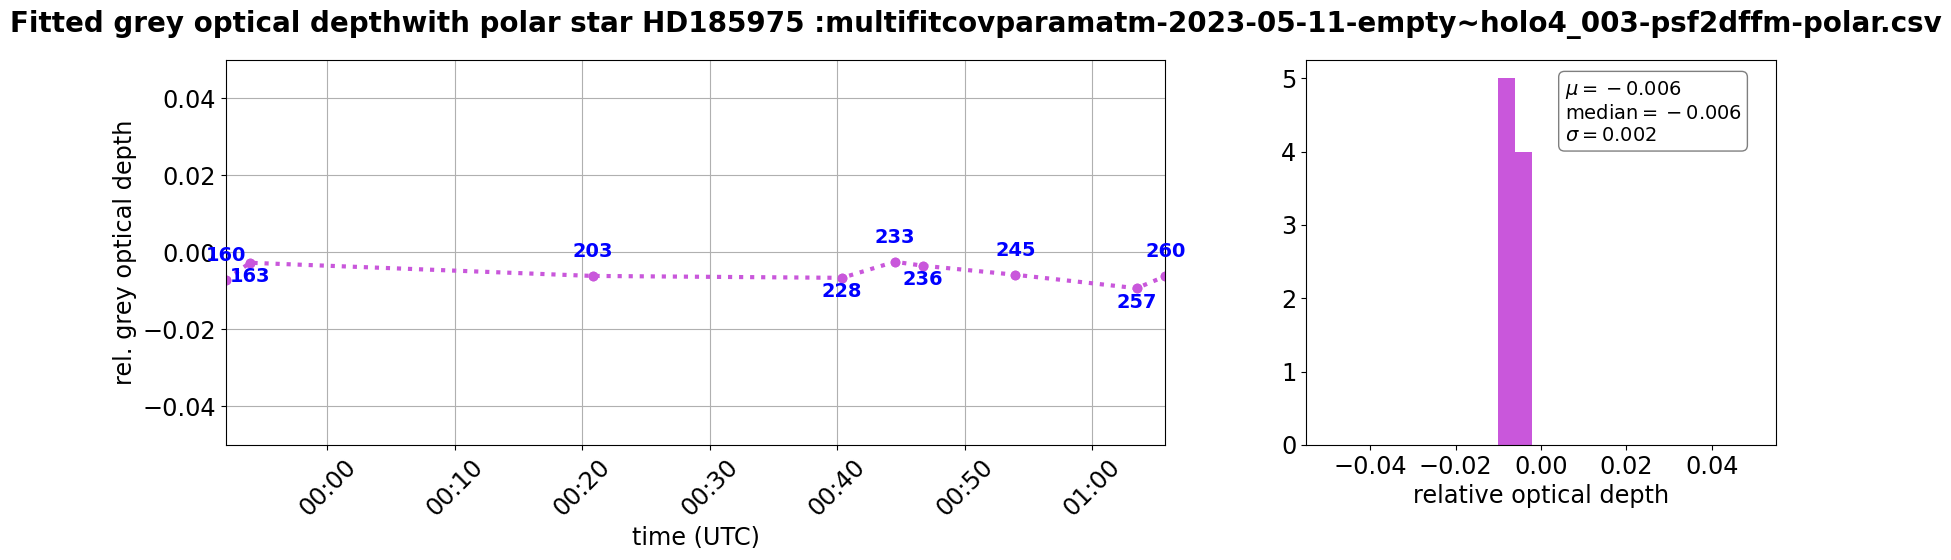

In [21]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 0.005

  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    ax.set_ylim(optdepth.min()-2*y_shift,optdepth.max()+2*y_shift)
    ax.set_xlim(start,end)
    
    ax.grid()
    ax.set_ylim(0-0.05,0.05)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], optdepth[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(optdepth,bins=25,range=(-0.05,0.05),facecolor=hls_colors[idx])
    ax.set_xlabel("relative optical depth")
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma =optdepth.std()
    
    textstr = '\n'.join((
    r'$\mu=%.3f$' % (mu, ),
    r'$\mathrm{median}=%.3f$' % (median, ),
    r'$\sigma=%.3f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted grey optical depthwith polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted grey optical depth with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74857/4076661384.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


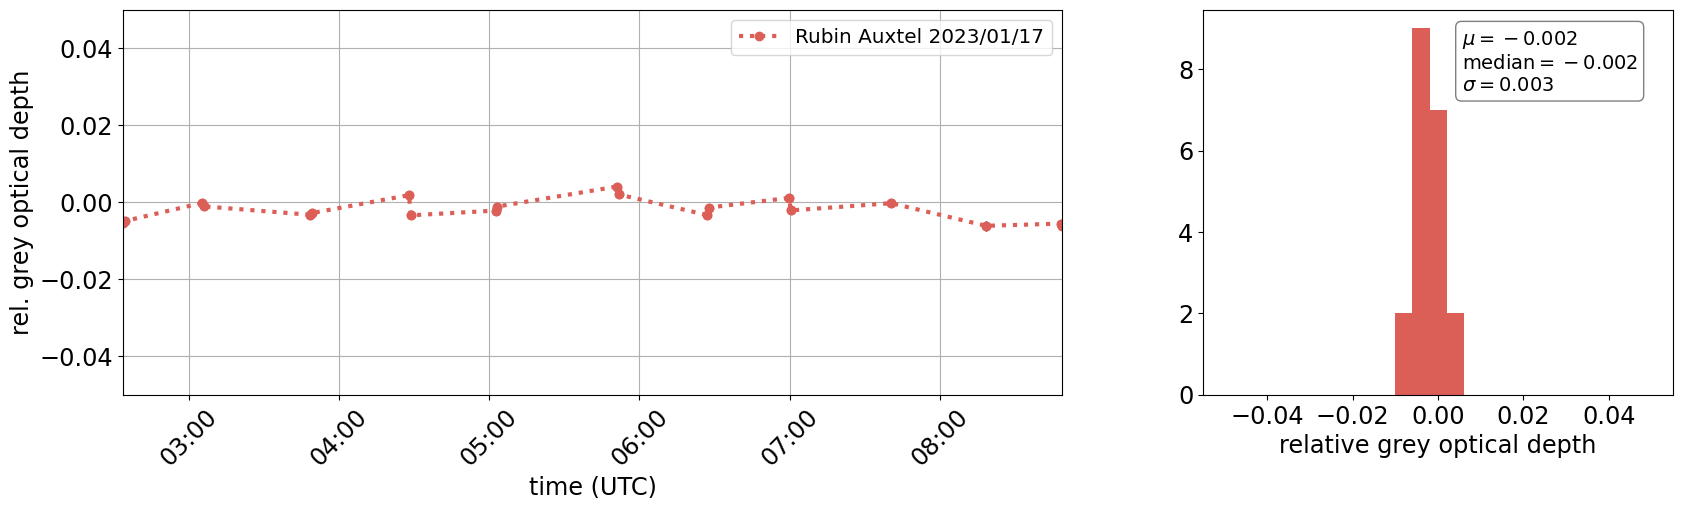

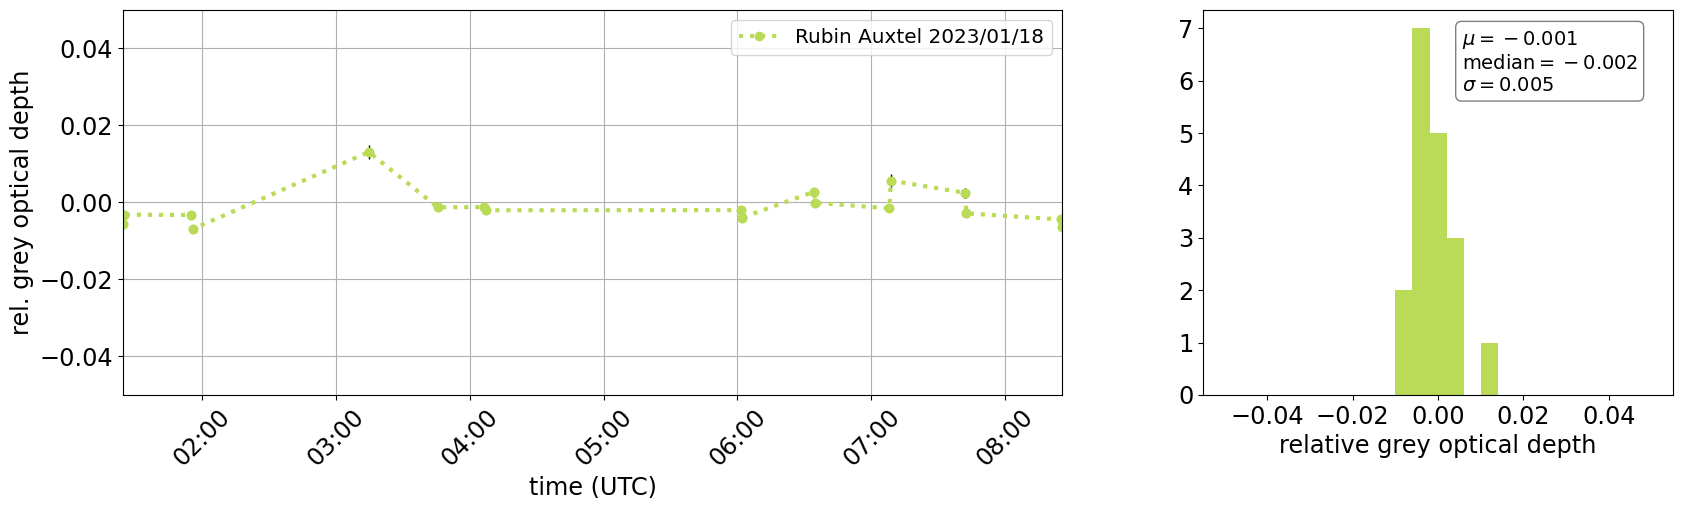

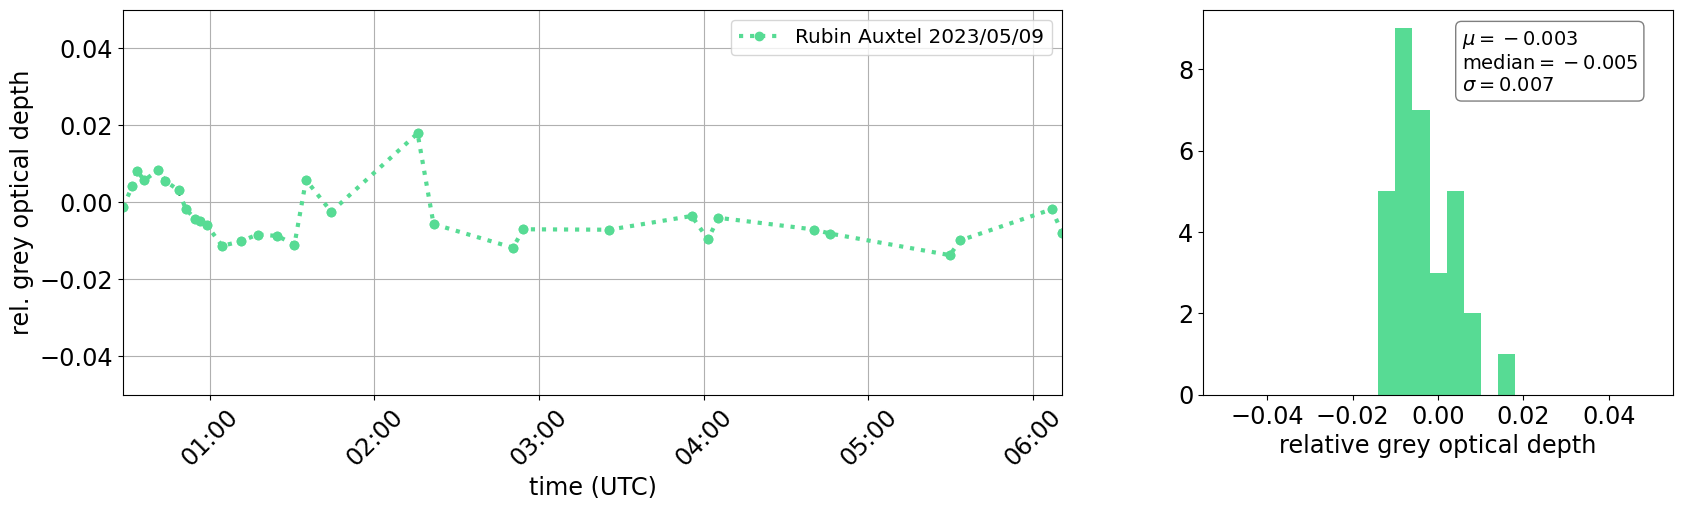

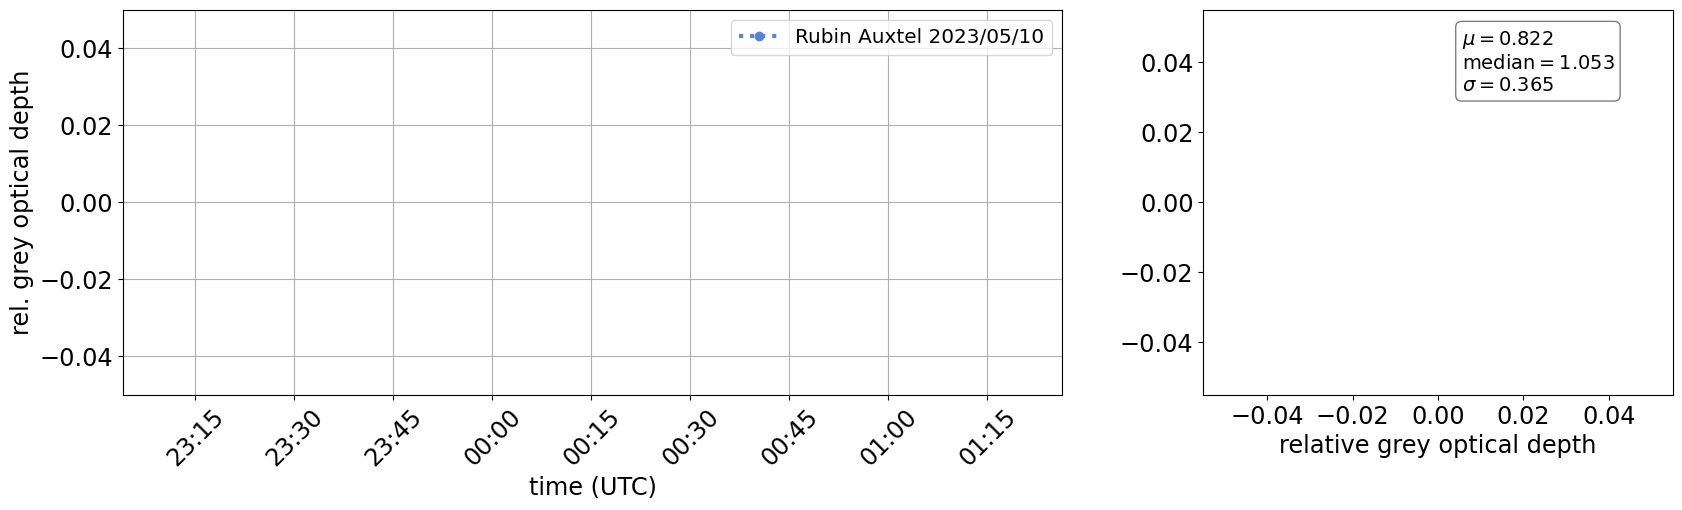

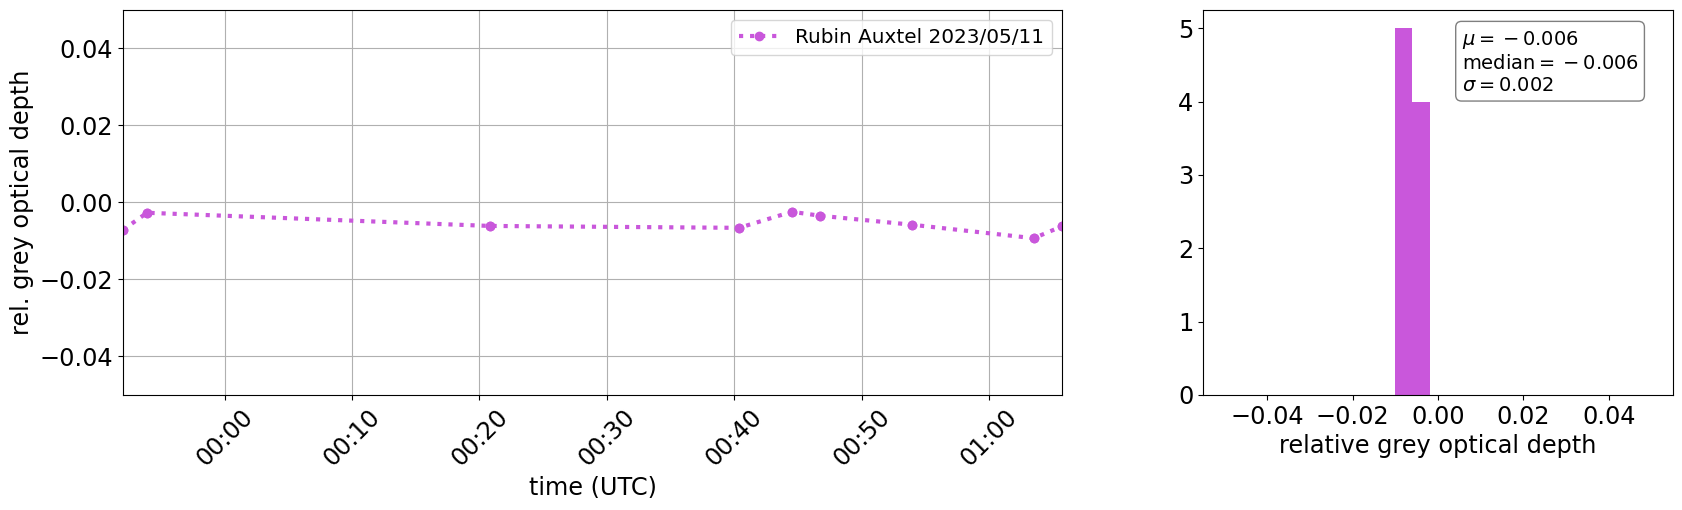

In [22]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
   
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    ax.legend()

    ax.set_xlim(start,end)
    ax.grid()
    ax.set_ylim(-0.05,0.05)

    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(optdepth,bins=25,range=(-0.05,0.05),facecolor=hls_colors[idx])
    ax.set_xlabel("relative grey optical depth")
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma = optdepth.std()
    
    textstr = '\n'.join((
    r'$\mu=%.3f$' % (mu, ),
    r'$\mathrm{median}=%.3f$' % (median, ),
    r'$\sigma=%.3f$ ' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted relative optical depth with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted relative optical with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_74857/226676183.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


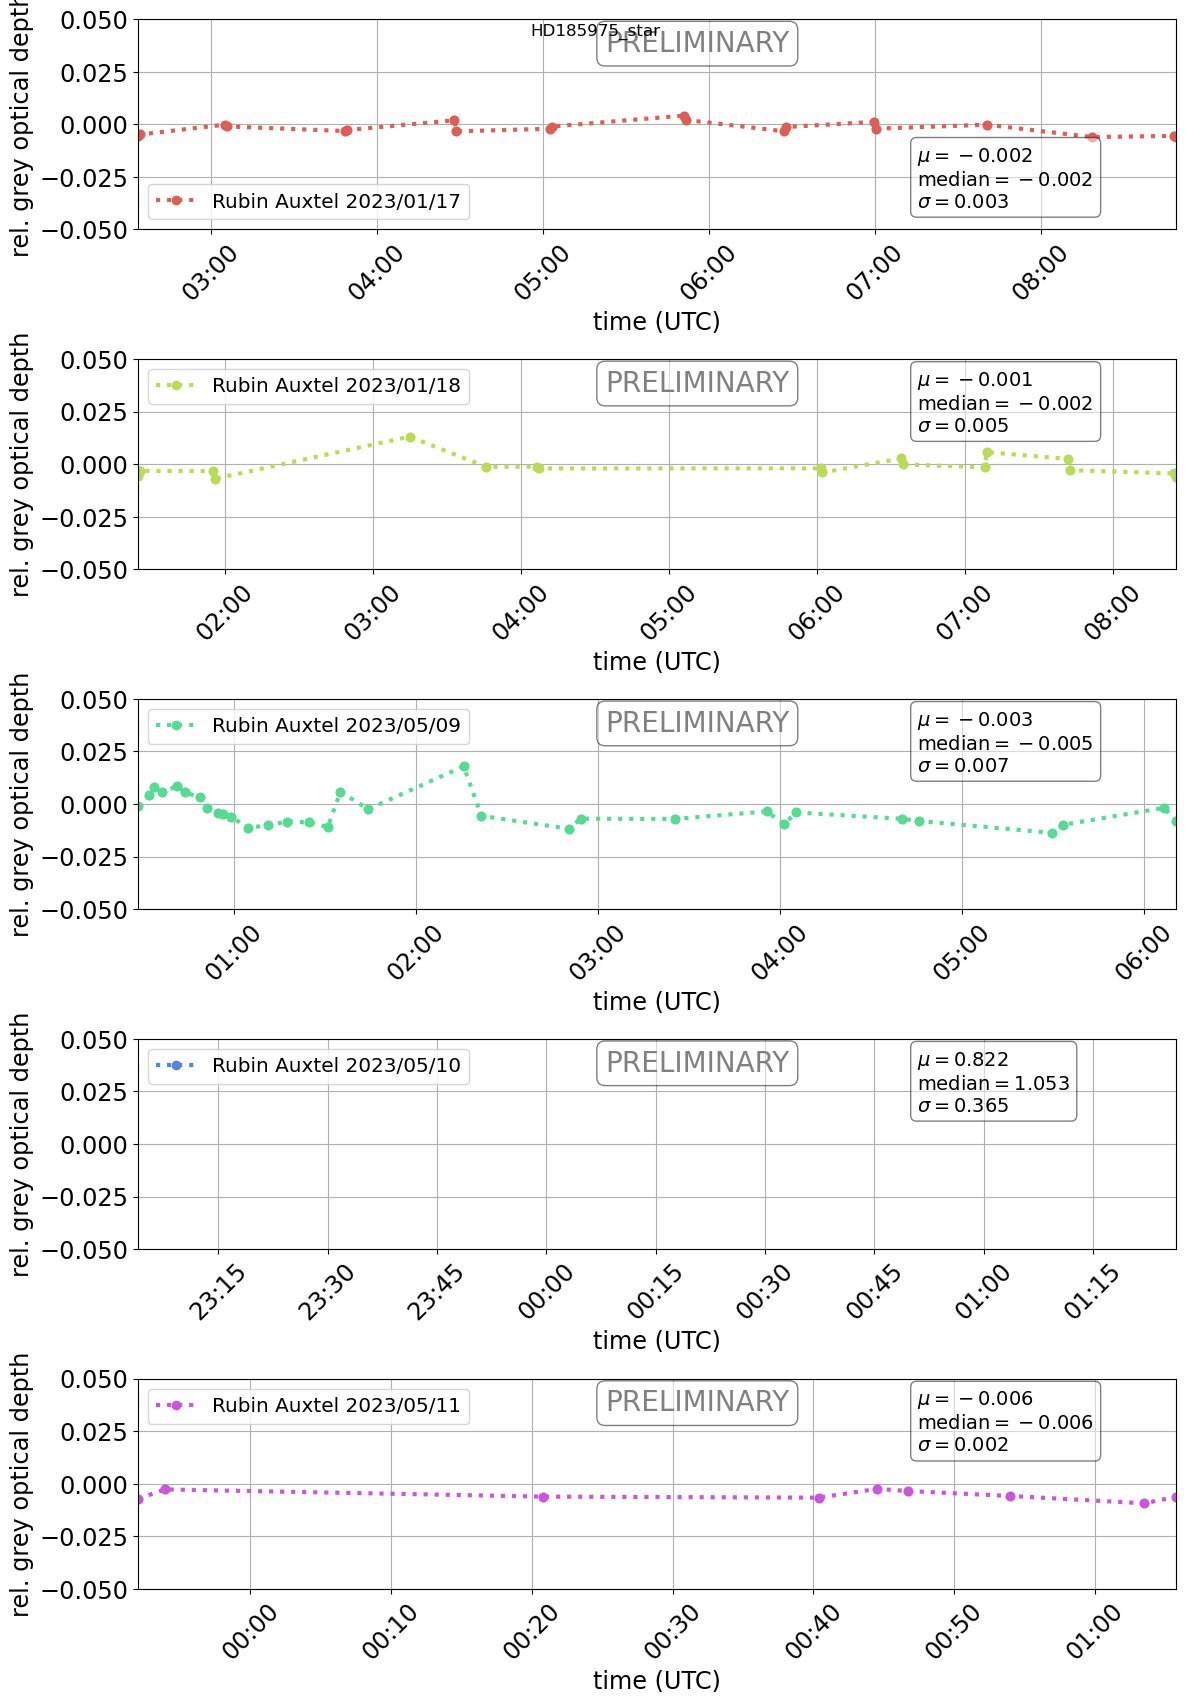

In [23]:
fig = plt.figure(figsize=(12,30))

gs = gridspec.GridSpec(9, 1,height_ratios=[1,1,1,1,1,1,1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    

    grey = infos['grey_1'].values
    egrey = infos['egrey_1'].values
    airmass = infos['spec_airmass'].values
    
    optdepth = -np.log(grey)/airmass
    eoptdepth = 1/airmass*egrey/grey
    
    
    mu = optdepth.mean()
    median = np.median(optdepth)
    sigma = optdepth.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,optdepth,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,optdepth,yerr=eoptdepth,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("rel. grey optical depth")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.3f$ ' % (mu, ),
    r'$\mathrm{median}=%.3f$ ' % (median, ),
    r'$\sigma=%.3f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(-0.05,0.05)


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_greyoptdepth_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

## Find pairs

In [24]:
all_df[0].columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

In [25]:
all_df[0]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
0,0,2023011700238,2023-01-18T02:33:44.320492641Z,HD185975,empty,2.094160,0,0,0,-221.203268,...,0.000984,0.082020,1.677237,4.064791,1.015405,0.131000,0.000957,0.028359,3.559431,0.459662
1,1,2023011700239,2023-01-18T02:34:27.138506292Z,HD185975,empty,2.094525,0,0,0,-221.024161,...,0.000865,0.081564,1.595088,4.092131,1.012622,0.132569,0.000973,0.047178,3.390434,0.615950
2,4,2023011700248,2023-01-18T03:05:13.302506988Z,HD185975,empty,2.109638,0,0,0,-213.214165,...,0.001476,0.098747,4.075385,3.787810,1.001530,0.187970,0.001407,0.020357,3.298105,0.333917
3,5,2023011700249,2023-01-18T03:05:56.221990758Z,HD185975,empty,2.109952,0,0,0,-213.034826,...,0.001163,0.090850,3.721151,3.743248,1.003164,0.189475,0.001414,0.007630,3.167403,0.327325
4,12,2023011700297,2023-01-18T03:48:30.275498016Z,HD185975,empty,2.126041,0,0,0,-202.940574,...,0.001029,0.068032,1.513858,3.622861,1.012200,0.116538,0.000891,0.031719,2.895900,0.537305
5,13,2023011700298,2023-01-18T03:49:13.267493074Z,HD185975,empty,2.126274,0,0,0,-202.760278,...,0.001512,0.016678,3.662746,3.530747,1.012293,0.174672,0.001326,0.005717,2.898397,0.516025
6,20,2023011700348,2023-01-18T04:27:59.378503148Z,HD185975,empty,2.137054,0,0,0,-192.888508,...,0.000827,0.064025,1.671969,4.329123,1.000325,0.130268,0.000966,0.049850,3.642199,0.493386
7,21,2023011700349,2023-01-18T04:28:42.290506469Z,HD185975,empty,2.137199,0,0,0,-192.707796,...,0.000983,0.033313,1.990134,4.066601,1.013292,0.133083,0.000993,0.000620,3.337444,0.641482
8,26,2023011700389,2023-01-18T05:02:33.121509356Z,HD185975,empty,2.142642,0,0,0,-184.192138,...,0.001782,0.054683,3.298335,3.744954,1.009617,0.159571,0.001214,0.018808,3.142729,0.331986
9,27,2023011700390,2023-01-18T05:03:16.039495757Z,HD185975,empty,2.142705,0,0,0,-184.012852,...,0.001855,0.046391,4.544635,3.639409,1.006661,0.186056,0.001412,0.013973,3.016887,0.344269


In [26]:
sorted(all_datetime)

[datetime.datetime(2023, 5, 11, 23, 52, 1, 599992),
 datetime.datetime(2023, 5, 11, 23, 53, 55, 34507),
 datetime.datetime(2023, 5, 12, 0, 20, 48, 671995),
 datetime.datetime(2023, 5, 12, 0, 40, 22, 965507),
 datetime.datetime(2023, 5, 12, 0, 44, 31, 382492),
 datetime.datetime(2023, 5, 12, 0, 46, 44, 261509),
 datetime.datetime(2023, 5, 12, 0, 53, 58, 869992),
 datetime.datetime(2023, 5, 12, 1, 3, 30, 314510),
 datetime.datetime(2023, 5, 12, 1, 5, 44, 961991)]

In [27]:
np.argsort(all_datetime)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [28]:
for idx,infos in enumerate(all_df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    
    print(idx,"argsort=",np.argsort(all_datetime))
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print("difftime",difftimes)
                 
    

0 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
difftime [42, 1846, 42, 2554, 42, 2326, 42, 2030, 42, 2865, 42, 2123, 42, 1914, 42, 2407, 2273, 1781, 42]
1 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
difftime [42, 1788, 43, 4735, 1854, 1241, 42, 6855, 42, 1926, 42, 1987, 42, 1988, 42, 2533, 42]
2 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
difftime [209, 99, 155, 313, 151, 287, 154, 212, 97, 154, 332, 402, 373, 431, 373, 253, 551, 1886, 349, 1734, 228, 1873, 1807, 353, 228, 2091, 349, 2617, 229, 1999, 230]
3 argsort= [0 1 2 3 4 5 6 7]
difftime [345, 1833, 2989, 242, 574, 539, 2015]
4 argsort= [0 1 2 3 4 5 6 7 8]
difftime [113, 1613, 1174, 248, 132, 434, 571, 134]


In [29]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    id_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            id_pairs.append(idx)
            
    all_doptdepth = []
    for idx in id_pairs:
    
        
        grey1 = df.iloc[idx]['grey_1']
        grey2 = df.iloc[idx+1]['grey_1']
        z1 = df.iloc[idx]['spec_airmass']
        z2 = df.iloc[idx+1]['spec_airmass']
        
        optdepth1 = -np.log(grey1)/z1
        optdepth2 = -np.log(grey2)/z2
        
        
        doptdepth = optdepth1-optdepth2
        all_doptdepth.append(doptdepth)       
    
    return np.array(id_pairs),np.array(all_doptdepth)
    

In [30]:
all_diffgrey = []
for df in all_df:
    idxs_pairs, grey_diff = FindPairs(df)
    all_diffgrey.append(grey_diff)

In [31]:
all_diffgrey = np.concatenate(all_diffgrey,axis=0)

In [32]:
the_mean =all_diffgrey.mean()

In [33]:
the_std = all_diffgrey.std()

In [34]:
the_median = np.median(all_diffgrey)

In [35]:
textstr = '\n'.join((
    r'$\mu=%.3f$' % (the_mean, ),
    r'$\mathrm{median}=%.3f$' % (the_median, ),
    r'$\sigma=%.3f$' % (the_std, )))

Text(0.5, 1.0, 'Grey optical depth difference in pairs')

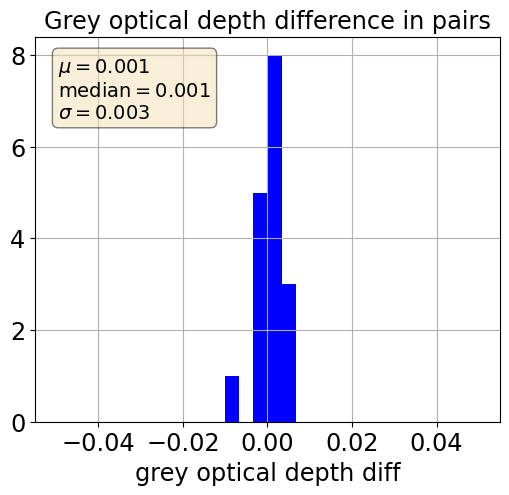

In [36]:
fig = plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
h = ax.hist(all_diffgrey,bins=30,range=(-0.05,0.05),facecolor="b");

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_xlabel("grey optical depth diff")
ax.grid()
ax.set_title("Grey optical depth difference in pairs")

In [37]:
df= all_df[0]

In [38]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_